In [ ]:
# pip install xlrd
# pip install --upgrade category_encoders

In [ ]:
import json
from sklearn.model_selection import train_test_split
import os
from tqdm.auto import tqdm
import shutil
import random
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import xlrd
import csv
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
path = r'C:/Users/Eduardo/Documents/Estudios/MCDD/Modulo2 IS/datasetCovid'

In [ ]:
def xlsx_to_csv(categories, path): 
    for category in categories: 
        aux_1 = path + '/' + category + '.csv'
        aux_2 = path + '/' + category + '.metadata.xlsx'
        df = pd.read_excel(aux_2)
        df.to_csv(aux_1)
    return

In [ ]:
xlsx_to_csv(categories, path)

In [ ]:
def create_file(dataset, path, categories): 
    dirs = {}
    for idx, category in enumerate(categories): 
        !mkdir "$path/$category"
        dirs[idx] = path+"/"+category
    print("Done! ",path)
    return dataset

In [ ]:
def dataset_to_dataframe(categories, path):
    category_2 = pd.DataFrame()
    for category in categories:
        cat = category
        cat_path = path + '/' + cat + '.csv'   
        category = pd.read_csv(cat_path, sep=',')
        category['CATEGORY'] = cat  
               
        category_2 = pd.concat([category_2, category], axis = 0)
    
    category_3 = category_2.reset_index()
    category_3 = category_3.drop(['index', 'Unnamed: 0'], axis=1)
    return category_3

In [ ]:
dataset = dataset_to_dataframe(categories, path)

In [ ]:
dataset.tail()

,FILE NAME,FORMAT,SIZE,URL,CATEGORY
21160,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia
21161,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia
21162,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia
21163,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia
21164,Viral Pneumonia-1345,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia


In [ ]:
dataset.groupby(['CATEGORY'], as_index=False).count()

,CATEGORY,FILE NAME,FORMAT,SIZE,URL
0,COVID,3616,3616,3616,3616
1,Lung_Opacity,6012,6012,6012,6012
2,Normal,10192,10192,10192,10192
3,Viral Pneumonia,1345,1345,1345,1345


In [ ]:
def encoder_dataset(dataset, category):
    encoder = OrdinalEncoder()
    encoder.fit(dataset[[category]])
    var_id = str(category) + '_ID'
    dataset[[var_id]] = encoder.transform(dataset[[category]])
    dataset[var_id] = dataset[var_id].astype(int)
    return dataset

In [ ]:
dataset = encoder_dataset(dataset,'CATEGORY' )
dataset.head()

,FILE NAME,FORMAT,SIZE,URL,CATEGORY,CATEGORY_ID
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0


In [ ]:
def add_route(dataset, path):
    dataset = pd.DataFrame(dataset)
    
    for idx, sample in tqdm(dataset.iterrows(), total=len(dataset)):
        image_name = dataset.at[idx,"FILE NAME"]
        category = dataset.at[idx,"CATEGORY"]        
        new_path = path +'/'+category+"/images/"+image_name+'.png'
        dataset.at[idx,"ROUTE"] = new_path  
        
    return dataset

In [ ]:
dataset = add_route(dataset, path)
dataset.tail()

  0%|          | 0/21165 [00:00<?, ?it/s]

,FILE NAME,FORMAT,SIZE,URL,CATEGORY,CATEGORY_ID,ROUTE
21160,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21161,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21162,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21163,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21164,Viral Pneumonia-1345,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...


In [ ]:
def height_images(dataset, path):
    dataset = pd.DataFrame(dataset)
    
    for idx, sample in tqdm(dataset.iterrows(), total=len(dataset)):
        image_name = dataset.at[idx,"FILE NAME"]
        category = dataset.at[idx,"CATEGORY"]
        
        new_path = path +'/'+category+"/images/"+image_name+'.png'
        
        aux_1 = Image.open(new_path)
        w,h = aux_1.size
        dataset.at[idx,'HEIGHT'] = h      
        
    return dataset

In [ ]:
dataset = height_images(dataset, path)
dataset.head()

  0%|          | 0/21165 [00:00<?, ?it/s]

,FILE NAME,FORMAT,SIZE,URL,CATEGORY,CATEGORY_ID,ROUTE,HEIGHT
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...,299.0
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...,299.0
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...,299.0
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...,299.0
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...,299.0


In [ ]:
def widht_images(dataset, path):
    dataset = pd.DataFrame(dataset)
    
    for idx, sample in tqdm(dataset.iterrows(), total=len(dataset)):
        image_name = dataset.at[idx,"FILE NAME"]
        category = dataset.at[idx,"CATEGORY"]
        
        new_path = path +'/'+category+"/images/"+image_name+'.png'
        
        aux_1 = Image.open(new_path)
        w,h = aux_1.size
        dataset.at[idx,'WIDTH'] = h
        
    return dataset

In [ ]:
def height_mask(dataset, path):
    dataset = pd.DataFrame(dataset)
    
    for idx, sample in tqdm(dataset.iterrows(), total=len(dataset)):
        image_name = dataset.at[idx,"FILE NAME"]
        category = dataset.at[idx,"CATEGORY"]
        
        new_path = path +'/'+category+"/masks/"+image_name+'.png'
        
        aux_1 = Image.open(new_path)
        w,h = aux_1.size
        dataset.at[idx,'HEIGHT'] = h
        
    return dataset

In [ ]:
def width_mask(dataset, path):
    dataset = pd.DataFrame(dataset)
    
    for idx, sample in tqdm(dataset.iterrows(), total=len(dataset)):
        image_name = dataset.at[idx,"FILE NAME"]
        category = dataset.at[idx,"CATEGORY"]
        
        new_path = path +'/'+category+"/masks/"+image_name+'.png'
        
        aux_1 = Image.open(new_path)
        w,h = aux_1.size
        dataset.at[idx,'WIDTH'] = w
        
    return dataset

In [ ]:
def visualize_all(image_array, dataset, columns):
    
    len_cat = len(dataset["CATEGORY"].unique())
    plt.rcParams["figure.figsize"] = (15,8) 

    for index, sample in enumerate(image_array):
        img = cv2.imread(sample[0])
        plt.subplot(len_cat, columns, index+1), plt.imshow(img)
        plt.title(sample[1])
        plt.xticks([]), plt.yticks([])

    random_category = random.randint(0,len(categories)-1)
    images = []
    num_images = 3

    cat = dataset["CATEGORY"].unique()

    for classes in cat:
        vars()[classes] = pd.DataFrame(dataset[dataset['CATEGORY'] == classes]).reset_index()

    for num in range(num_images):
        aux_1 = vars()[classes]

        random_image = random.randint(0,len(aux_1)-1)
        images.append([aux_1.at[random_image,"ROUTE"],categories[aux_1.at[random_image,"CATEGORY_ID"]]])

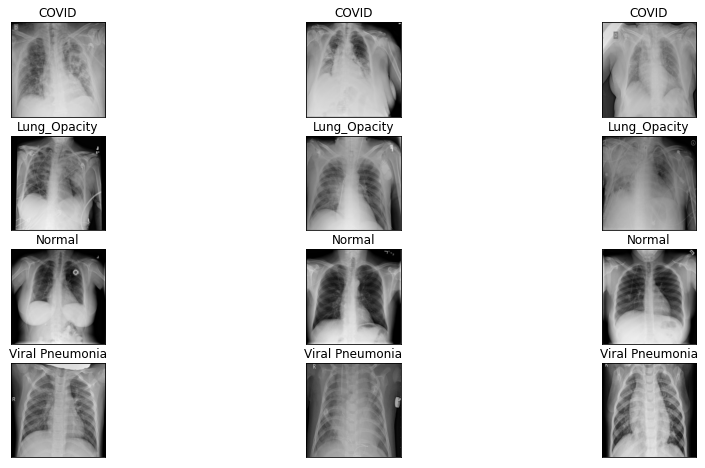

In [ ]:
visualize_all(images, dataset, 3)

In [ ]:
def visualize_category(dataset, category):
    
    dataset = pd.DataFrame(dataset)
    df = dataset.loc[dataset['CATEGORY'] == category] 
    df = df.reset_index()
    
    random_image = random.randint(0,len(df)-2)
    var = df.at[random_image,"ROUTE"]
    
    plt.rcParams["figure.figsize"] = (15,8) 
       
    img = cv2.imread(var)         
    plt.imshow(img)
    plt.title(category)

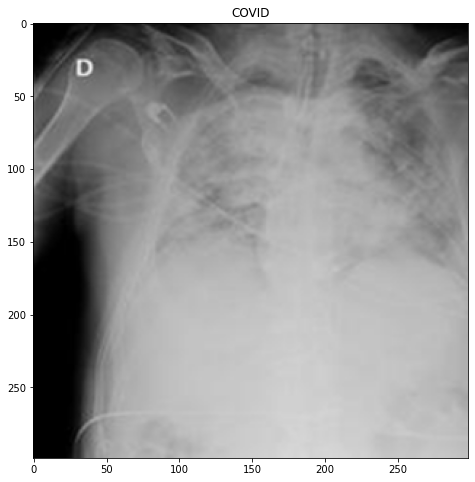

In [ ]:
visualize_category(dataset, 'COVID')

In [ ]:
dataset.tail()

,index,FILE NAME,FORMAT,SIZE,URL,CATEGORY,CATEGORY_ID,ROUTE
21160,1340,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21161,1341,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21162,1342,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21163,1343,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21164,1344,Viral Pneumonia-1345,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...


In [ ]:
def rename_image(path, dataset, lastName, newName):
    
    df = dataset.loc[dataset['FILE NAME'] == lastName]
    last_image = df.iloc[0]['ROUTE']
    cat_image = df.iloc[0]['CATEGORY']
    new_image = path+ '/' + cat_image +"/images/"+ newName + '.png'
    os.rename(last_image, new_image)
    df.iloc[0].replace(to_replace=last_image, value = new_image)
    
    return df  

In [ ]:
rename_image(path, dataset,'COVID-1', 'COVID-1' )

,index,FILE NAME,FORMAT,SIZE,URL,CATEGORY,CATEGORY_ID,ROUTE
0,0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...


In [ ]:
def delete_image(path, dataset, name):
    df = dataset.loc[dataset['FILE NAME'] == name]
    route_image = df.iloc[0]['ROUTE']
    #os.remove(route_image)
    
    df_2 = dataset.loc[dataset['ROUTE'] != route_image]
    df_2 = df_2.reset_index()
    df_2 = df_2.drop(['index'], axis=1)
    print('Imagen ' + name +' removida correctamente')
    return df_2

In [ ]:
delete_image(path, dataset, 'COVID-1')

Imagen COVID-1 removida correctamente


,FILE NAME,FORMAT,SIZE,URL,CATEGORY,CATEGORY_ID,ROUTE
0,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
1,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
2,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
3,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
4,COVID-6,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,0,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
...,...,...,...,...,...,...,...
21159,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21160,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21161,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...
21162,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,3,C:/Users/Eduardo/Documents/Estudios/MCDD/Modul...


In [ ]:
def most_repeated_category(dataset):
    df = pd.DataFrame(res.groupby(['CATEGORY'], as_index=False)['FORMAT'].count())
    cat_max = pd.DataFrame(df.max())
    cat_max = cat_max.reset_index()
    cat_max = cat_max.iloc[0][0]
    return cat_max

In [ ]:
most_repeated_category(dataset)

'Viral Pneumonia'

In [ ]:
def less_repeated_category(dataset):
    df = pd.DataFrame(res.groupby(['CATEGORY'], as_index=False)['FORMAT'].count())
    cat_min = pd.DataFrame(df.min())
    cat_min = cat_min.reset_index()
    cat_min = cat_min.iloc[0][0]
    return cat_min

In [ ]:
less_repeated_category(dataset)

'COVID'